The goal of this notebook is to quickly get insights about the data. Since it is easy to lose sight of the final goal, I want to keep this phase as simple as possible, reminding myself what can be iterated further.

In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline
pd.set_option('max_columns', 500)

# A first glimpse of the data

In this phase, we look for the general data structure, the data types, the missing values, and some general idea of how the values are distributed. 

It is better to not go too much into details now as we did not created a test set just yet. Therefore, if we were getting more than a simple idea, we could be indirectly using information about the test set before training.

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
def list_missing(data, verbose=True):
    mis_cols = [col for col in data.columns if data[col].isna().any()]
    if not verbose:
        return mis_cols
    tot_rows = len(data)
    for col in mis_cols:
        print(f'Column {col}: {round(data[col].isna().sum()*100/tot_rows, 2)}% missing')
    return mis_cols

In [6]:
mis_train = list_missing(df_train)
print('_'*40)
print('\n')
mis_test = list_missing(df_test)

Column LotFrontage: 17.74% missing
Column Alley: 93.77% missing
Column MasVnrType: 0.55% missing
Column MasVnrArea: 0.55% missing
Column BsmtQual: 2.53% missing
Column BsmtCond: 2.53% missing
Column BsmtExposure: 2.6% missing
Column BsmtFinType1: 2.53% missing
Column BsmtFinType2: 2.6% missing
Column Electrical: 0.07% missing
Column FireplaceQu: 47.26% missing
Column GarageType: 5.55% missing
Column GarageYrBlt: 5.55% missing
Column GarageFinish: 5.55% missing
Column GarageQual: 5.55% missing
Column GarageCond: 5.55% missing
Column PoolQC: 99.52% missing
Column Fence: 80.75% missing
Column MiscFeature: 96.3% missing
________________________________________


Column MSZoning: 0.27% missing
Column LotFrontage: 15.56% missing
Column Alley: 92.67% missing
Column Utilities: 0.14% missing
Column Exterior1st: 0.07% missing
Column Exterior2nd: 0.07% missing
Column MasVnrType: 1.1% missing
Column MasVnrArea: 1.03% missing
Column BsmtQual: 3.02% missing
Column BsmtCond: 3.08% missing
Column Bsmt

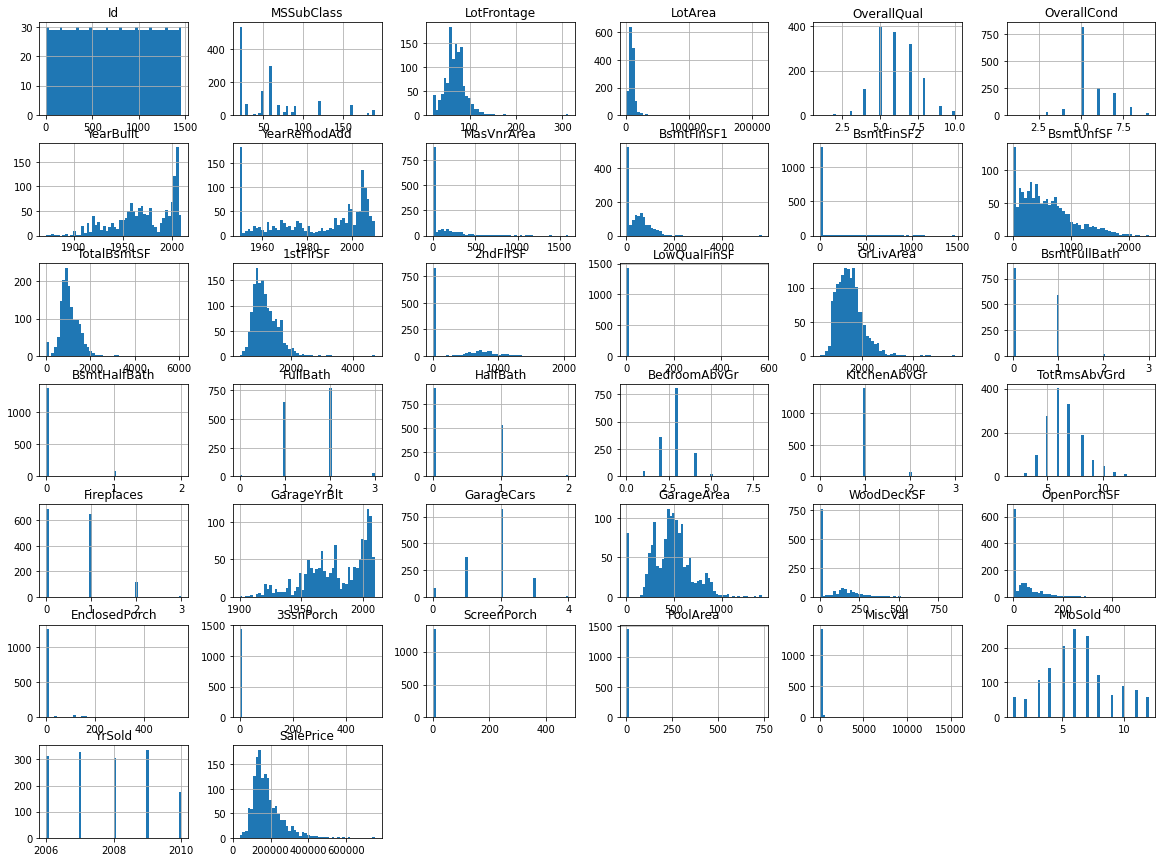

In [7]:
df_train.hist(bins=50, figsize=(20,15))
plt.show()

# Use the documentation

We have seen that there are quite a few missing values but, luckily, the data came with some documentation that clarifies the nature of most of them. We can thus create a cleaning function to take care of these entries. We use a function so that later on it will be easier to incorporate this step in our pipeline.

In [8]:
def clean_general(data, train=True):
    df = data.copy()
    if train:
        # remove known outliers from train set
        df = df.loc[df.GrLivArea < 4500].reset_index(drop=True)
    #LotFrontage
    df.loc[df.LotFrontage.isnull(), 'LotFrontage'] = 0
    #Alley
    df.loc[df.Alley.isnull(), 'Alley'] = "NoAlley"
    #MSSubClass
    df['MSSubClass'] = df['MSSubClass'].astype(str)
    #MissingBasement
    fil = ((df.BsmtQual.isnull()) & (df.BsmtCond.isnull()) & (df.BsmtExposure.isnull()) &
          (df.BsmtFinType1.isnull()) & (df.BsmtFinType2.isnull()))
    fil1 = ((df.BsmtQual.notnull()) | (df.BsmtCond.notnull()) | (df.BsmtExposure.notnull()) |
          (df.BsmtFinType1.notnull()) | (df.BsmtFinType2.notnull()))
    df.loc[fil1, 'MisBsm'] = 0
    df.loc[fil, 'MisBsm'] = 1 # made explicit for safety
    #BsmtQual
    df.loc[fil, 'BsmtQual'] = "NoBsmt" #missing basement
    #BsmtCond
    df.loc[fil, 'BsmtCond'] = "NoBsmt" #missing basement
    #BsmtExposure
    df.loc[fil, 'BsmtExposure'] = "NoBsmt" #missing basement
    #BsmtFinType1
    df.loc[fil, 'BsmtFinType1'] = "NoBsmt" #missing basement
    #BsmtFinType2
    df.loc[fil, 'BsmtFinType2'] = "NoBsmt" #missing basement
    #FireplaceQu
    df.loc[(df.Fireplaces == 0) & (df.FireplaceQu.isnull()), 'FireplaceQu'] = "NoFire" #missing
    #MisGarage
    fil = ((df.GarageYrBlt.isnull()) & (df.GarageType.isnull()) & (df.GarageFinish.isnull()) &
          (df.GarageQual.isnull()) & (df.GarageCond.isnull()))
    fil1 = ((df.GarageYrBlt.notnull()) | (df.GarageType.notnull()) | (df.GarageFinish.notnull()) |
          (df.GarageQual.notnull()) | (df.GarageCond.notnull()))
    df.loc[fil1, 'MisGarage'] = 0
    df.loc[fil, 'MisGarage'] = 1
    #GarageYrBlt
    df.loc[df.GarageYrBlt > 2200, 'GarageYrBlt'] = 2007 #correct mistake
    df.loc[fil, 'GarageYrBlt'] = 0
    #GarageType
    df.loc[fil, 'GarageType'] = "NoGrg" #missing garage
    #GarageFinish
    df.loc[fil, 'GarageFinish'] = "NoGrg" #missing
    #GarageQual
    df.loc[fil, 'GarageQual'] = "NoGrg" #missing
    #GarageCond
    df.loc[fil, 'GarageCond'] = "NoGrg" #missing
    #Fence
    df.loc[df.Fence.isnull(), 'Fence'] = "NoFence" #missing fence
    #Pool
    fil = ((df.PoolArea == 0) & (df.PoolQC.isnull()))
    df.loc[fil, 'PoolQC'] = 'NoPool' 
    return df

In [9]:
df_train = clean_general(df_train)
df_test = clean_general(df_test, train=False)

In [10]:
mis_train = list_missing(df_train)
print('_'*40)
print('\n')
mis_test = list_missing(df_test)

Column MasVnrType: 0.55% missing
Column MasVnrArea: 0.55% missing
Column BsmtExposure: 0.07% missing
Column BsmtFinType2: 0.07% missing
Column Electrical: 0.07% missing
Column MiscFeature: 96.3% missing
________________________________________


Column MSZoning: 0.27% missing
Column Utilities: 0.14% missing
Column Exterior1st: 0.07% missing
Column Exterior2nd: 0.07% missing
Column MasVnrType: 1.1% missing
Column MasVnrArea: 1.03% missing
Column BsmtQual: 0.14% missing
Column BsmtCond: 0.21% missing
Column BsmtExposure: 0.14% missing
Column BsmtFinSF1: 0.07% missing
Column BsmtFinSF2: 0.07% missing
Column BsmtUnfSF: 0.07% missing
Column TotalBsmtSF: 0.07% missing
Column BsmtFullBath: 0.14% missing
Column BsmtHalfBath: 0.14% missing
Column KitchenQual: 0.07% missing
Column Functional: 0.14% missing
Column GarageYrBlt: 0.14% missing
Column GarageFinish: 0.14% missing
Column GarageCars: 0.07% missing
Column GarageArea: 0.07% missing
Column GarageQual: 0.14% missing
Column GarageCond: 0.14%

Next, we know that the target has a skewed distribution, which will confuse most of the algorithms. We thus take the logarithm of it in order to make the skeweness less severe.

In [11]:
df_train['Target'] = np.log1p(df_train.SalePrice)

del df_train['SalePrice']

# Set up a test environment

As mentioned before, getting insights before having a proper test set would lead to a model that performs better in cross-validation but that not necessarily generalizes better.

In [12]:
def make_test(train, test_size, random_state, strat_feat=None):
    if strat_feat:
        
        split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)

        for train_index, test_index in split.split(train, train[strat_feat]):
            train_set = train.loc[train_index]
            test_set = train.loc[test_index]
            
    return train_set, test_set

In [13]:
train_set, test_set = make_test(df_train, 
                                test_size=0.2, random_state=654, 
                                strat_feat='Neighborhood')

From now onwards, we will explore only the training set.

# Get insights

We want to get a comprehensive understanding of the data but also to not spend too much time on exploring every corner of them. At least not before having built some model.

We will thus focus on the following:

* Correlation with target
* Univariate analysis of interesting features
* Bivariate analysis of interesting features
* Bivariate + category, in case there is some interesting segmentation
* Missing values, what are they and what to do with them.

## Numerical features

In [14]:
def plot_correlations(data, target=None, limit=50, figsize=(12,10), **kwargs):
    corr = data.corr()
    if target:
        corr['abs'] = abs(corr['Target'])
        cor_target = corr.sort_values(by='abs', ascending=False)[target]
        cor_target = cor_target[:limit]
        del corr['abs']
        corr = corr.loc[cor_target.index, cor_target.index]
    plt.figure(figsize=figsize)
    ax = sns.heatmap(corr, cmap='RdBu_r', **kwargs)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    return cor_target

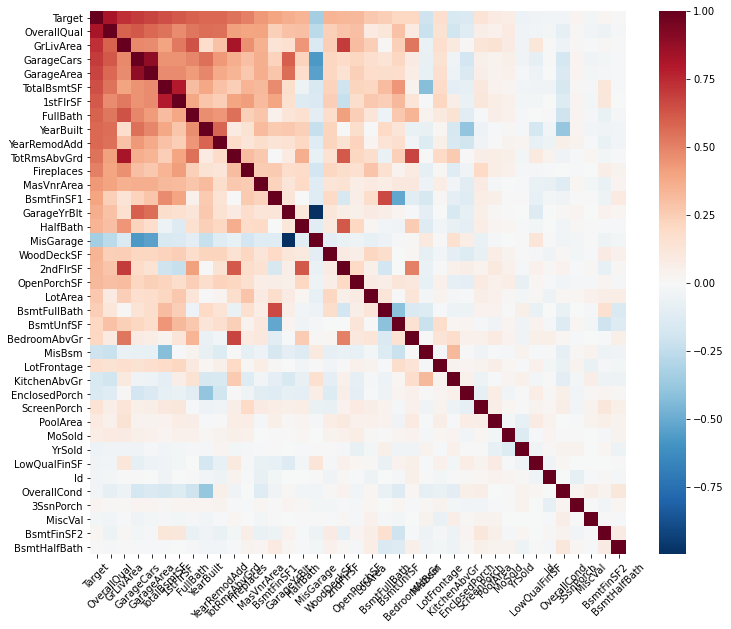

In [15]:
high_corr = plot_correlations(train_set, 'Target')

We see that, among the numerical features, not many of them have not null correlation, let's zoom into the top 10.

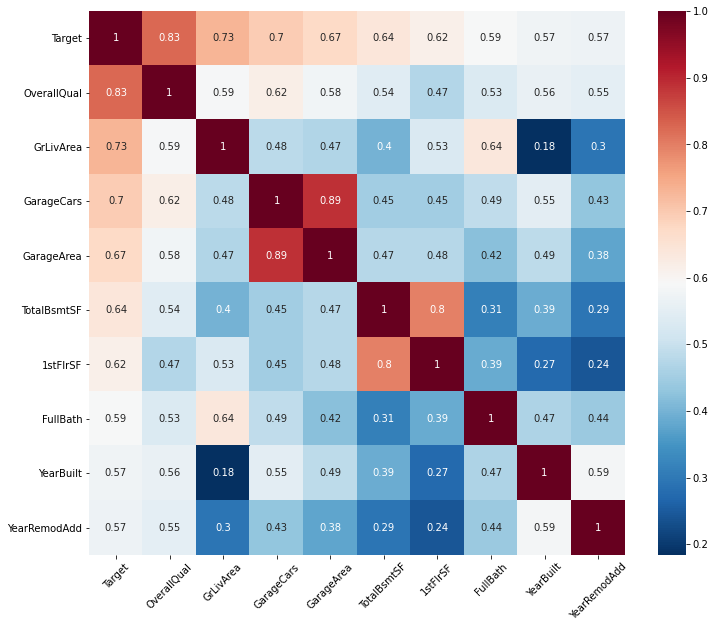

In [16]:
high_corr = plot_correlations(train_set, 'Target', limit=10, annot=True)

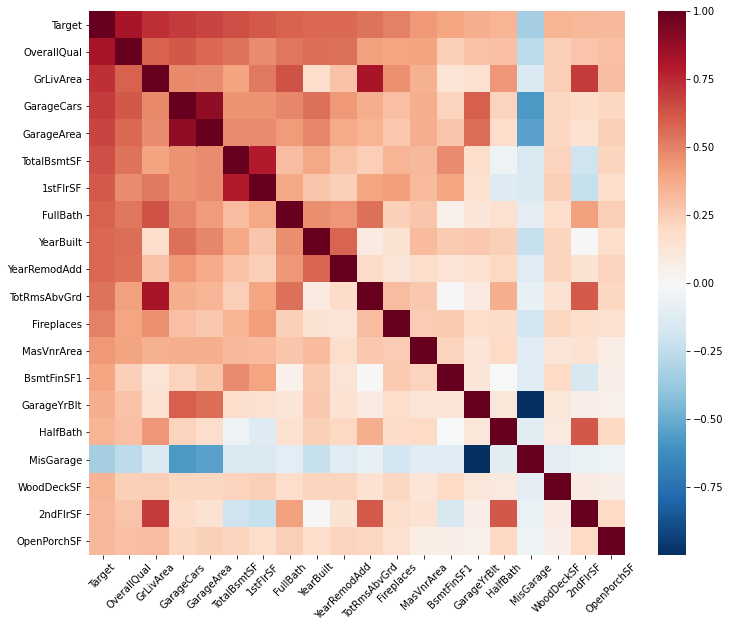

In [17]:
high_corr = plot_correlations(train_set, 'Target', limit=20)

Some things are very intuitive

* Overall quality and price are very correlated
* Garage cars and garage area are very correlated

However, it is interesting to notice the strong correlation between 1st floor SF and total SF of the basement.

Let's see how the most correlated features are distributed.

In [18]:
def plot_distribution(data, column, bins=50, correlation=None):
    plt.figure(figsize=(12,8))
    data[column].hist(bins=bins)
    if not correlation is None:
        value = correlation[column]
        column = column + f' - {round(value,2)}'
    plt.title(f'Distribution of {column}', fontsize=18)
    plt.grid(False)

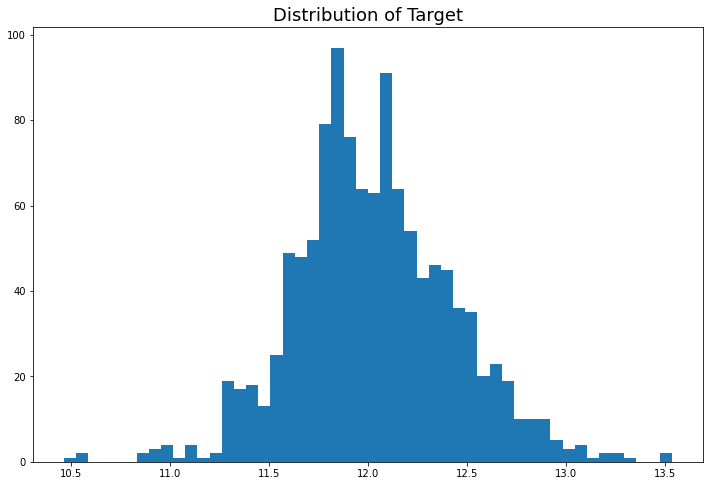

In [19]:
plot_distribution(train_set, 'Target')

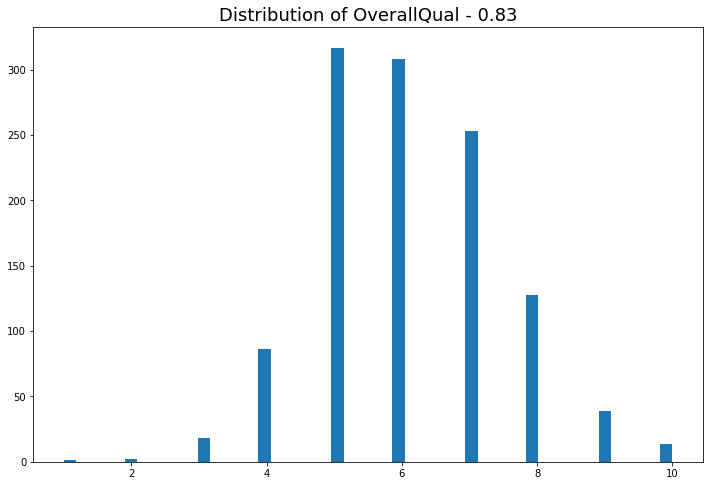

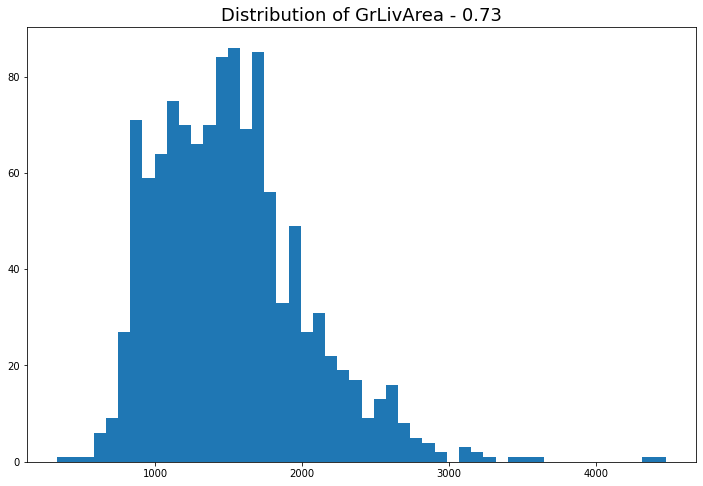

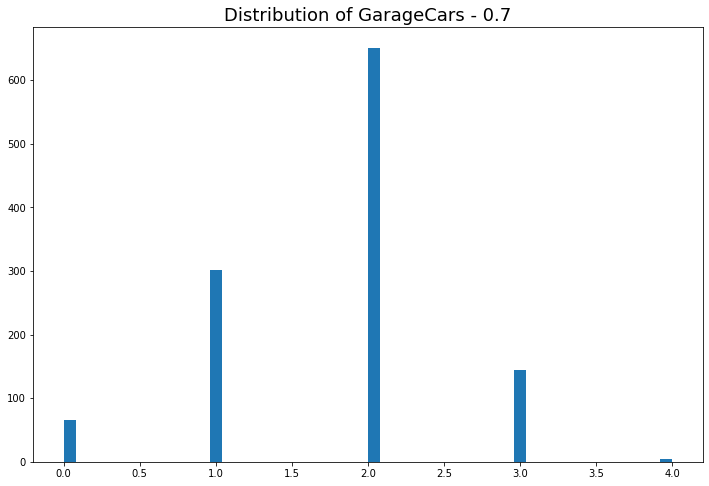

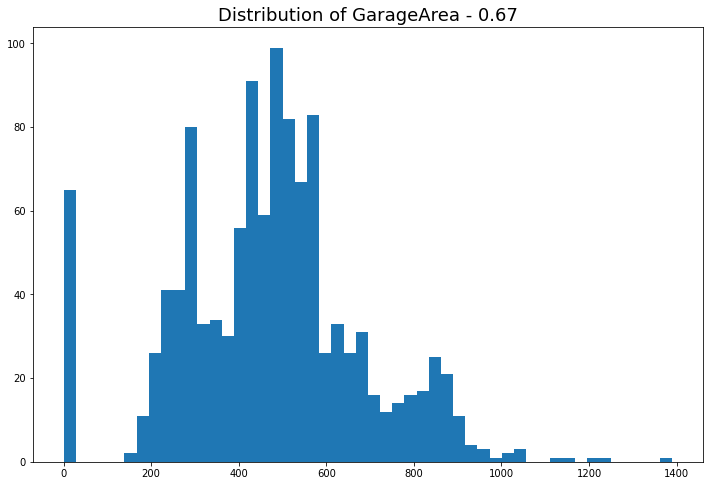

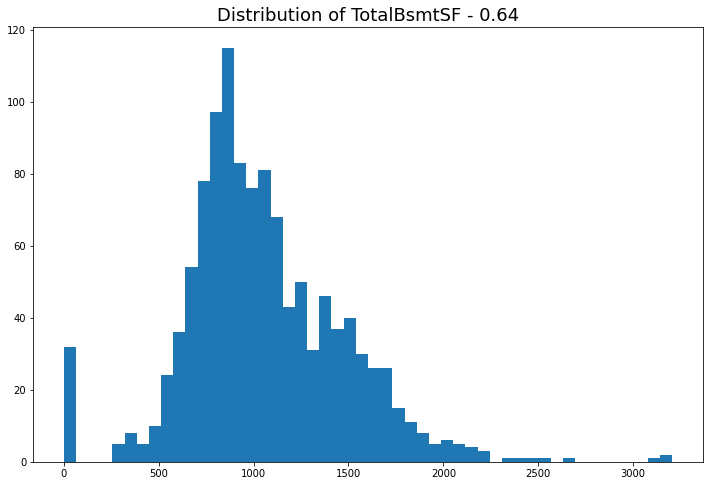

In [20]:
for col in high_corr[1:6].index:
    plot_distribution(train_set, col, correlation=high_corr)

It is now time to plot these features against the target, this will help us spotting some pattern.

In [21]:
def plot_bivariate(data, x, y, hue=None, **kwargs):
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=data, x=x, y=y, hue=hue, **kwargs)
    if hue:
        plt.title(f'{x} vs {y}, by {hue}', fontsize=18)
    else:
        plt.title(f'{x} vs {y}', fontsize=18)

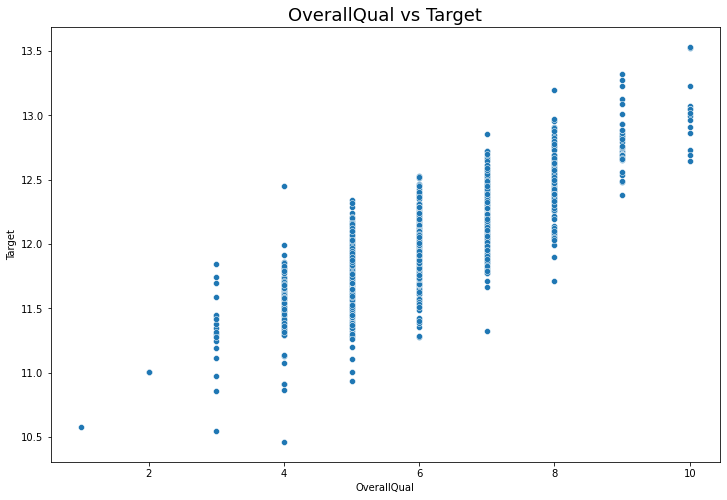

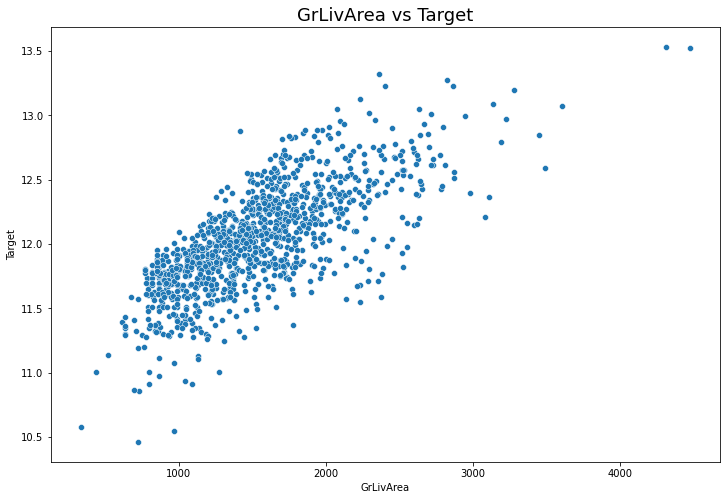

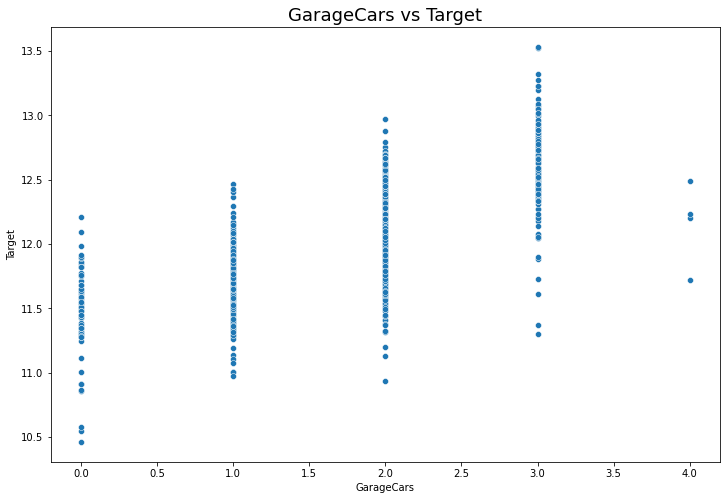

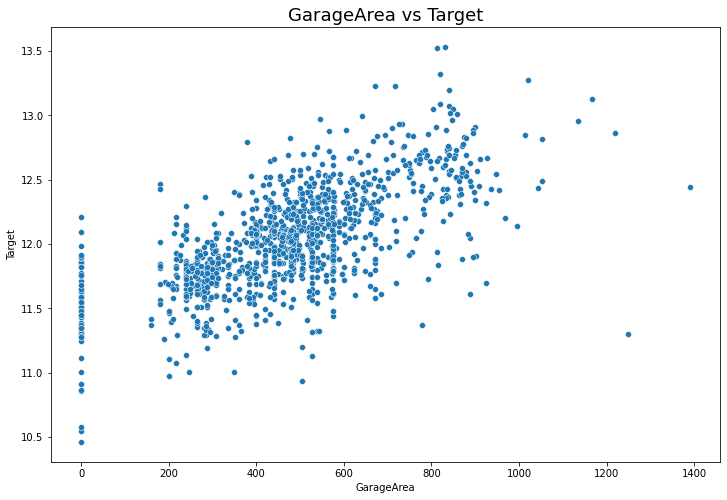

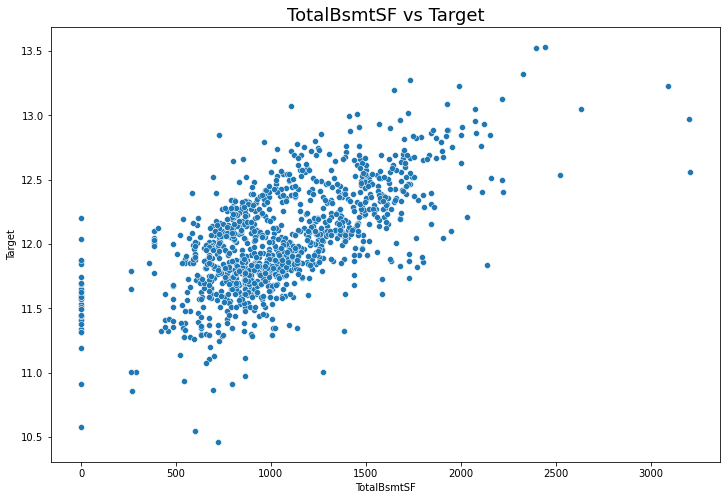

In [22]:
for col in high_corr[1:6].index:
    plot_bivariate(train_set, x=col, y='Target')

We see a very clear pattern for all these features, confirming the hint that the correlation matrix gave us. It seems we will need to use them to build our model.

To get some more insight, I want to add a linear regression in these plots.

In [23]:
def corr_target(data, target, cols, x_estimator=None):
    print(data[cols+[target]].corr())
    num = len(cols)
    rows = int(num/2) + (num % 2 > 0)
    cols = list(cols)
    y = data[target]
    fig, ax = plt.subplots(rows, 2, figsize=(12, 5 * (rows)))
    i = 0
    j = 0
    for feat in cols:
        x = data[feat]
        if (rows > 1):
            sns.regplot(x=x, y=y, ax=ax[i][j], x_estimator=x_estimator)
            j = (j+1)%2
            i = i + 1 - j
        else:
            sns.regplot(x=x, y=y, ax=ax[i], x_estimator=x_estimator)
            i = i+1

              OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
OverallQual      1.000000   0.587055    0.618582    0.577956     0.541684   
GrLivArea        0.587055   1.000000    0.482516    0.471170     0.399067   
GarageCars       0.618582   0.482516    1.000000    0.889179     0.449308   
GarageArea       0.577956   0.471170    0.889179    1.000000     0.474743   
TotalBsmtSF      0.541684   0.399067    0.449308    0.474743     1.000000   
1stFlrSF         0.471802   0.530118    0.450187    0.476417     0.796268   
FullBath         0.531866   0.638428    0.488032    0.423072     0.311910   
YearBuilt        0.562561   0.184469    0.548583    0.486097     0.389798   
YearRemodAdd     0.551677   0.295764    0.431481    0.378194     0.294774   
TotRmsAbvGrd     0.410755   0.824105    0.367417    0.339575     0.250345   
Fireplaces       0.395942   0.455642    0.299828    0.271536     0.340404   
MasVnrArea       0.406049   0.357104    0.363389    0.364187     0.328107   

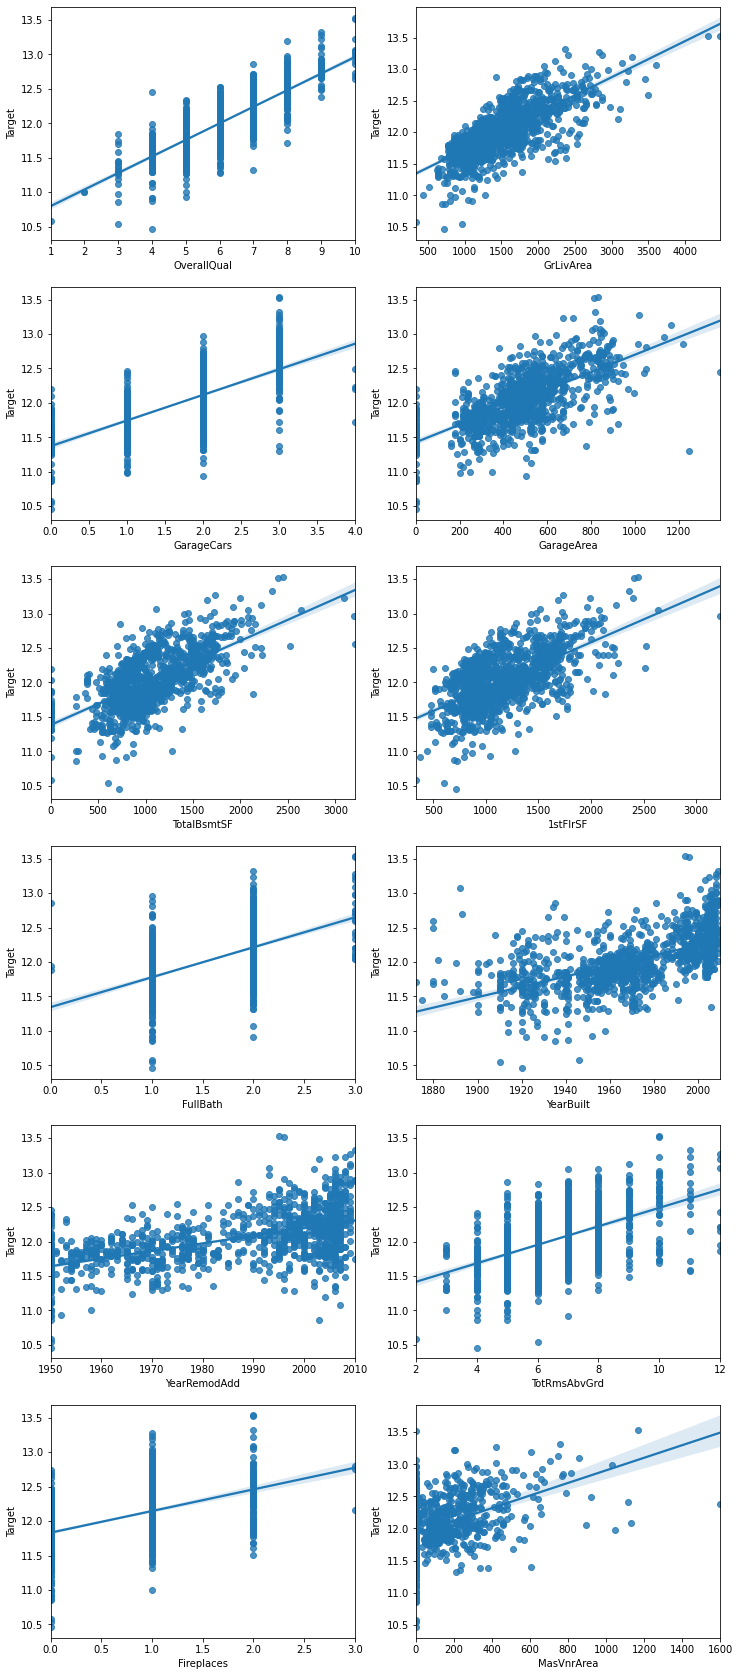

In [24]:
corr_target(train_set, 'Target', list(high_corr[1:13].index))

The discrete values of GarageCars and OverallQual invite in using some estimator to see if the patter is clear as it looks.

             OverallQual  GarageCars    Target
OverallQual     1.000000    0.618582  0.826131
GarageCars      0.618582    1.000000  0.696102
Target          0.826131    0.696102  1.000000


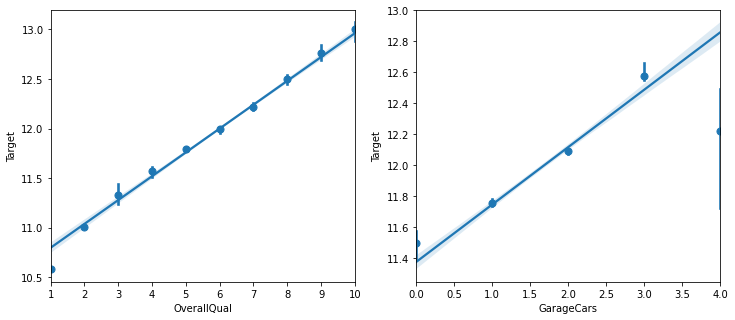

In [25]:
corr_target(train_set, 'Target', 
            [col for col in high_corr.index if 'Qual' in col or 'Car' in col], 
            x_estimator=np.median)

I wonder if there are other columns that exhibit such a clear pattern.

              OverallQual  YearBuilt  YearRemodAdd  LowQualFinSF  GarageCars  \
OverallQual      1.000000   0.562561      0.551677     -0.035127    0.618582   
YearBuilt        0.562561   1.000000      0.585170     -0.176583    0.548583   
YearRemodAdd     0.551677   0.585170      1.000000     -0.081673    0.431481   
LowQualFinSF    -0.035127  -0.176583     -0.081673      1.000000   -0.089813   
GarageCars       0.618582   0.548583      0.431481     -0.089813    1.000000   
YrSold          -0.041630  -0.019934      0.026561     -0.043847   -0.041168   
Target           0.826131   0.574151      0.570928     -0.041792    0.696102   

                YrSold    Target  
OverallQual  -0.041630  0.826131  
YearBuilt    -0.019934  0.574151  
YearRemodAdd  0.026561  0.570928  
LowQualFinSF -0.043847 -0.041792  
GarageCars   -0.041168  0.696102  
YrSold        1.000000 -0.054141  
Target       -0.054141  1.000000  


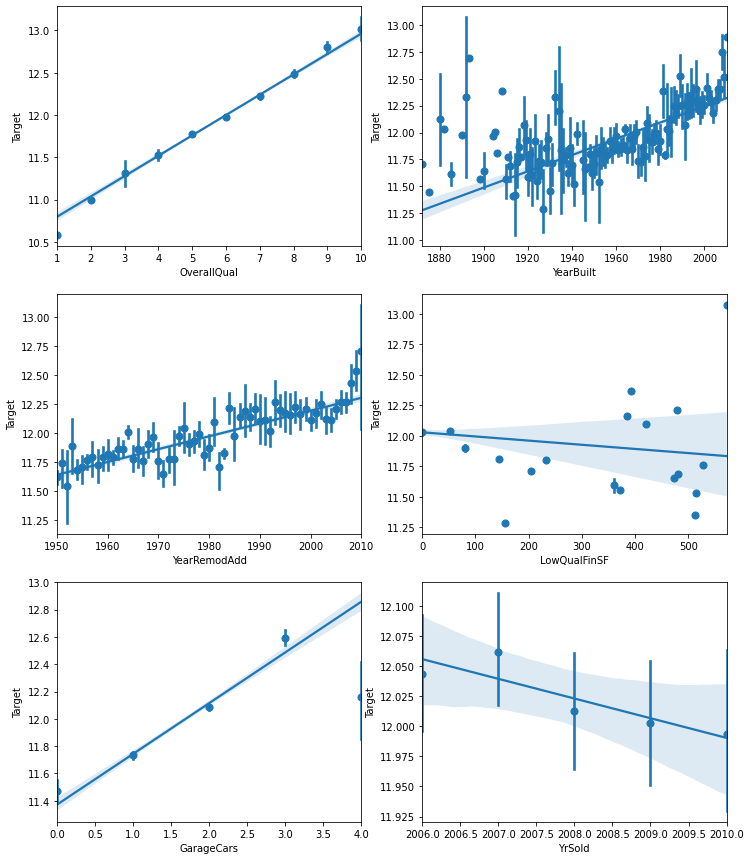

In [26]:
corr_target(train_set, 'Target', 
            [col for col in train_set.select_dtypes(include=['int64']).columns if 
             'Yr' in col or 'Cars' in col or 'Qual' in col or 'Year' in col], 
            x_estimator=np.mean)

It seems there is some sort of periodic pattern in YearBuilt, this reminds me that Neighborhoods are normally built in the same period and they infuence the price quite significantly.

Since this is categorical feature, let's move to the next section

## Categorical features

There are quite a few of these and it appears clear that not all of them are really categorical.

In [27]:
cats = list(train_set.select_dtypes(include=['object']).columns)
cats = train_set[['Target']+cats]

cats

,Target,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1231,11.530775,90,RL,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NoBsmt,GasA,TA,Y,SBrkr,TA,Typ,NoFire,CarPort,Unf,TA,TA,Y,NoPool,NoFence,NaN,WD,Normal
1456,11.864469,20,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NoFire,Attchd,Unf,TA,TA,Y,NoPool,NoFence,NaN,WD,Normal
242,11.277216,50,RM,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,N,FuseA,TA,Typ,NoFire,Attchd,Unf,Fa,TA,Y,NoPool,NoFence,NaN,WD,Normal
93,11.804856,190,C (all),Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,Fa,Mn,Rec,Unf,GasW,Ex,N,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,NoPool,NoFence,NaN,WD,Normal
1268,11.877576,50,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasW,TA,Y,FuseA,TA,Typ,NoFire,Attchd,Unf,TA,TA,Y,NoPool,GdWo,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,11.876881,20,RL,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,Gd,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Min2,TA,Attchd,RFn,TA,TA,Y,NoPool,NoFence,NaN,WD,Normal
990,12.031725,70,RM,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,Gd,Gd,BrkTil,TA,TA,No,BLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Attchd,Unf,TA,TA,P,NoPool,NoFence,NaN,WD,Normal
445,11.755879,20,RL,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,NoPool,MnPrv,NaN,COD,Normal
370,12.057578,60,RL,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NoPool,NoFence,NaN,WD,Normal


In [28]:
def ks_test(data, col, target, critical=0.05):
    df = pd.get_dummies(data[[col]+[target]], columns=[col])
    
    for col in df.columns:
        if col == target:
            continue
        tmp_1 = df[df[col] == 1][target]
        tmp_2 = df[df[col] == 0][target]
        ks, p = stats.ks_2samp(tmp_1, tmp_2)
        if p < critical:
            return True
    return False
    

def find_cats(data, target, thrs=0.1, agg_func='mean', critical=0.05, ks=True, frac=1):
    cats = []
    tar_std = data[target].std()
    for col in data.select_dtypes(include=['object']).columns:
        counts = data[col].value_counts(dropna=False, 
                                        normalize=True)
        tmp = data.loc[data[col].isin(counts[counts > thrs].index),:]
        if ks:
            try:
                res = ks_test(tmp, col, target, critical=critical)
            except ValueError as e:
                print(f'Column {col} throws the following error: {e}')
                continue
            if res:
                cats.append(col)
        else:
            res = tmp.groupby(col)[target].agg(agg_func).std()
            if res >= tar_std*frac:
                cats.append(col)    
    return cats

In [29]:
find_cats(train_set, 'Target', thrs=0.3, critical=0.05)

Column MSSubClass throws the following error: Data passed to ks_2samp must not be empty
Column MSZoning throws the following error: Data passed to ks_2samp must not be empty
Column Street throws the following error: Data passed to ks_2samp must not be empty
Column Alley throws the following error: Data passed to ks_2samp must not be empty
Column LandContour throws the following error: Data passed to ks_2samp must not be empty
Column Utilities throws the following error: Data passed to ks_2samp must not be empty
Column LotConfig throws the following error: Data passed to ks_2samp must not be empty
Column LandSlope throws the following error: Data passed to ks_2samp must not be empty
Column Condition1 throws the following error: Data passed to ks_2samp must not be empty
Column Condition2 throws the following error: Data passed to ks_2samp must not be empty
Column BldgType throws the following error: Data passed to ks_2samp must not be empty
Column RoofStyle throws the following error: Da

['LotShape',
 'HouseStyle',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'KitchenQual']

In [30]:
find_cats(train_set, 'Target', thrs=0, ks=False)

['Condition2',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'KitchenQual',
 'MiscFeature']

In [31]:
find_cats(train_set, 'Target', thrs=0.05, agg_func='mean', ks=False)

['BsmtQual', 'KitchenQual', 'GarageType', 'GarageQual', 'GarageCond']

In [32]:
find_cats(train_set, 'Target', thrs=0.1, frac=0.5, ks=False)

['MSSubClass',
 'MSZoning',
 'Neighborhood',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

It seems that our function is telling us to focus on different columns, depending on the method we use. Let's see if we can get some visual insights.

In [33]:
def segm_target(data, cat, target):
    df = data.groupby(cat)[target].agg(['count', 'mean', 'max', 
                                        'min', 'median', 'std'])
    fig, ax = plt.subplots(1,2, figsize=(12, 5))
    sns.boxplot(x=cat, y=target, data=data, ax=ax[0])
    for val in data[cat].unique():
        tmp = data[data[cat] == val]
        sns.kdeplot(tmp[target], linewidth=3, alpha=0.7,
                 label=val, ax=ax[1])  
    return df

,count,mean,max,min,median,std
BsmtQual,,,,,,
Ex,92,12.661743,13.534474,11.724005,12.683831,0.343460
Fa,22,11.726709,12.239996,11.198228,11.734057,0.262231
Gd,496,12.184570,13.195616,11.289794,12.178193,0.284848
NoBsmt,32,11.532958,12.198549,10.579005,11.552167,0.301022
TA,524,11.807075,13.071072,10.460271,11.813037,0.300840


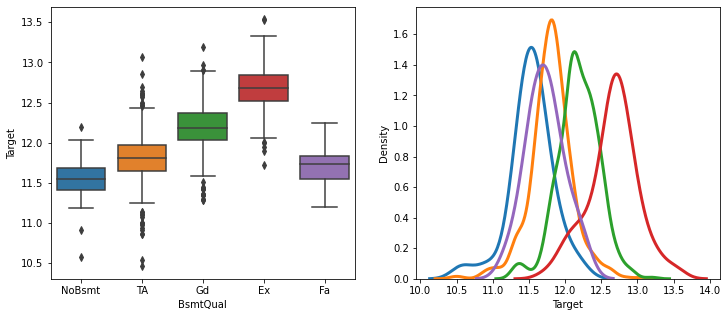

In [34]:
segm_target(train_set, 'BsmtQual', 'Target')

It seems there is a very clear relation between the quality of the basement and the sale price. Moreover, it invites in recoding BsmtQual into an ordinal feature.

The same holds for KitchenQual

,count,mean,max,min,median,std
KitchenQual,,,,,,
Ex,81,12.675378,13.534474,11.429555,12.691584,0.376239
Fa,31,11.465739,12.069686,10.579005,11.594515,0.371069
Gd,463,12.224121,12.991756,11.277216,12.225880,0.282112
TA,591,11.811277,12.791359,10.460271,11.820418,0.277610


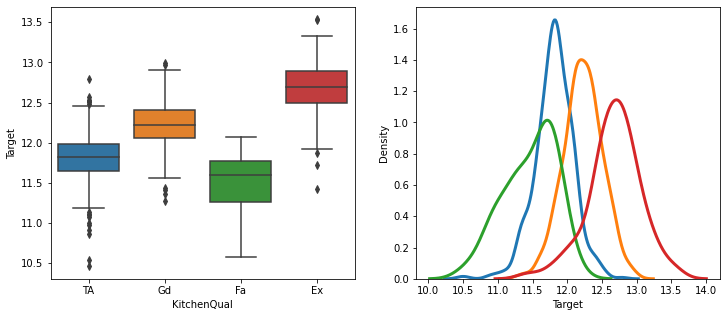

In [35]:
segm_target(train_set, 'KitchenQual', 'Target')

,count,mean,max,min,median,std
GarageType,,,,,,
2Types,5,11.872651,12.137264,11.373675,11.918397,0.296850
Attchd,686,12.161124,13.534474,11.002117,12.128117,0.336671
Basment,14,11.927821,12.791359,10.933000,11.911348,0.439980
BuiltIn,76,12.381833,13.275829,11.418626,12.334850,0.393289
CarPort,6,11.603902,12.013101,11.314487,11.560335,0.253804
Detchd,314,11.775048,13.071072,10.976799,11.765634,0.272427
NoGrg,65,11.468998,12.208575,10.460271,11.492733,0.351975


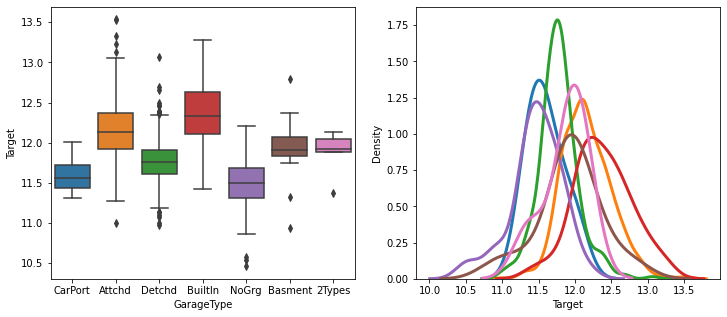

In [36]:
segm_target(train_set, 'GarageType', 'Target')

/home/lucabasa/Git/kaggle_competitions/houseprice/hp/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


,count,mean,max,min,median,std
GarageQual,,,,,,
Ex,3,12.175455,13.071072,11.699413,11.755879,0.776141
Fa,39,11.688656,12.452937,11.074436,11.652696,0.321713
Gd,13,12.200231,12.691584,11.411457,12.128117,0.389088
NoGrg,65,11.468998,12.208575,10.460271,11.492733,0.351975
Po,1,11.477309,11.477309,11.477309,11.477309,NaN
TA,1045,12.071222,13.534474,10.933000,12.043560,0.372185


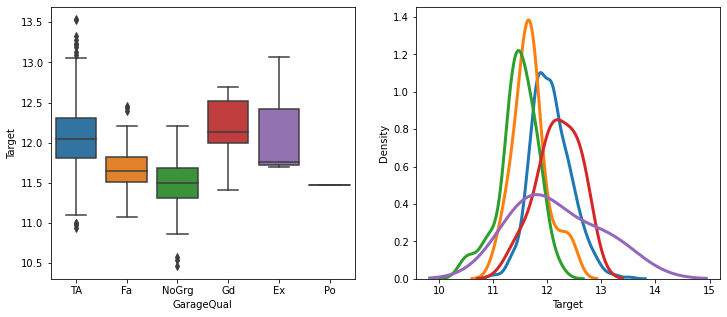

In [37]:
segm_target(train_set, 'GarageQual', 'Target')

,count,mean,max,min,median,std
GarageCond,,,,,,
Ex,2,11.727646,11.755879,11.699413,11.727646,0.039928
Fa,29,11.629388,12.301387,10.976799,11.652696,0.302013
Gd,9,12.050621,12.618186,11.682677,11.904974,0.322364
NoGrg,65,11.468998,12.208575,10.460271,11.492733,0.351975
Po,5,11.614001,11.728045,11.477309,11.589896,0.102620
TA,1056,12.073540,13.534474,10.933000,12.050885,0.373912


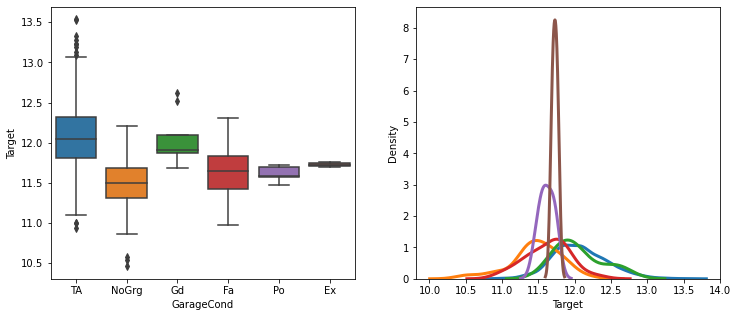

In [38]:
segm_target(train_set, 'GarageCond', 'Target')

,count,mean,max,min,median,std
MSZoning,,,,,,
C (all),8,11.264265,11.804856,10.460271,11.326318,0.423704
FV,51,12.230169,12.823631,11.878631,12.190964,0.235481
RH,13,11.769591,12.106258,11.277216,11.849405,0.248174
RL,915,12.089927,13.534474,10.579005,12.072547,0.382054
RM,179,11.694055,13.071072,10.542733,11.695255,0.315682


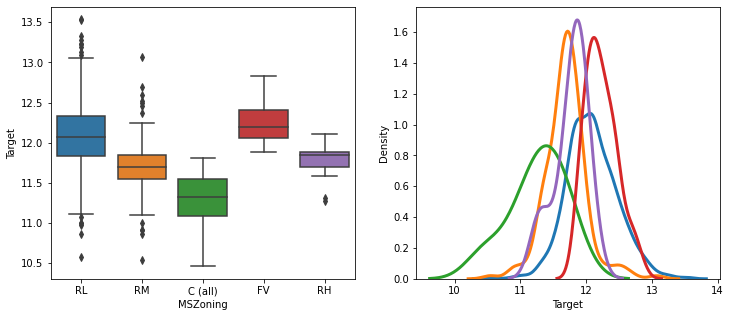

In [39]:
segm_target(train_set, cats.columns[2], 'Target')

,count,mean,max,min,median,std
Alley,,,,,,
Grvl,39,11.671358,12.452937,10.868587,11.686887,0.317249
NoAlley,1092,12.038498,13.534474,10.460271,12.014161,0.402332
Pave,35,12.032971,12.491176,11.440366,12.058158,0.210114


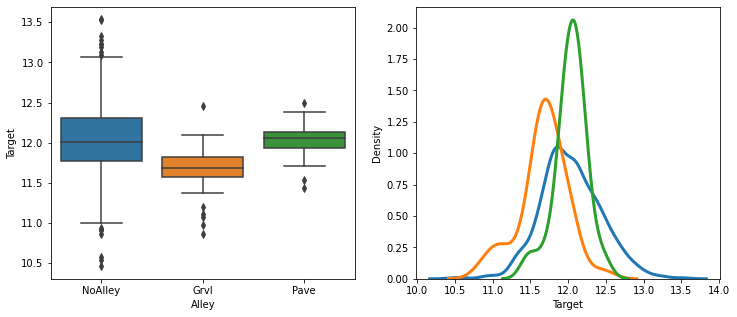

In [40]:
segm_target(train_set, cats.columns[4], 'Target')

,count,mean,max,min,median,std
LotShape,,,,,,
IR1,370,12.185910,13.534474,10.859018,12.157409,0.373096
IR2,35,12.333127,13.195616,11.884496,12.310437,0.344046
IR3,7,12.136881,12.523530,11.198228,12.165985,0.462872
Reg,754,11.932324,13.275829,10.460271,11.884496,0.383705


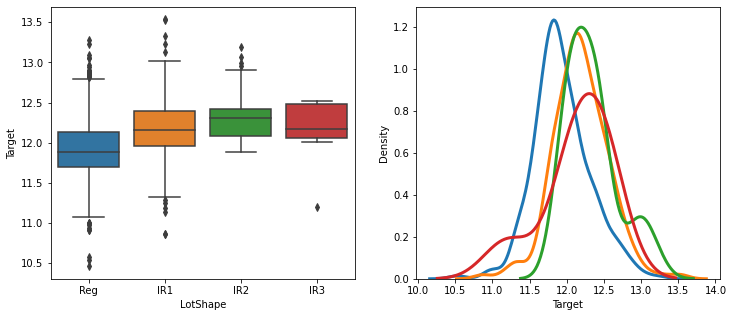

In [41]:
segm_target(train_set, cats.columns[5], 'Target')

,count,mean,max,min,median,std
LandContour,,,,,,
Bnk,51,11.796394,12.660331,10.868587,11.819682,0.375605
HLS,41,12.281423,13.195616,11.320566,12.341263,0.452393
Low,26,12.161752,12.861001,10.579005,12.353902,0.500883
Lvl,1048,12.023871,13.534474,10.460271,12.001512,0.390484


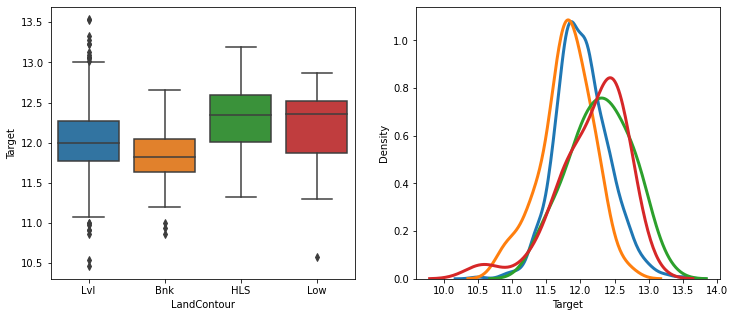

In [42]:
segm_target(train_set, cats.columns[6], 'Target')

,count,mean,max,min,median,std
LotConfig,,,,,,
Corner,208,12.025456,13.534474,10.868587,12.012189,0.397802
CulDSac,77,12.260282,13.195616,11.338584,12.259618,0.350309
FR2,32,12.050867,12.729324,11.302217,12.038823,0.329354
FR3,2,12.000136,12.240479,11.759793,12.000136,0.339896
Inside,847,12.004028,13.323929,10.460271,11.976666,0.402102


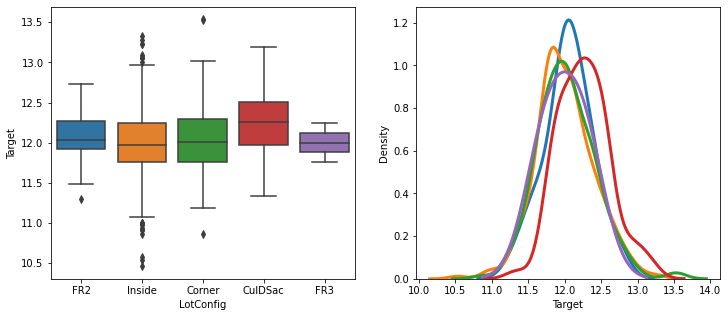

In [43]:
segm_target(train_set, cats.columns[8], 'Target')

,count,mean,max,min,median,std
LandSlope,,,,,,
Gtl,1105,12.021629,13.534474,10.460271,11.995358,0.393935
Mod,53,12.094606,13.195616,10.579005,12.154785,0.525229
Sev,8,12.182730,12.618186,11.594330,12.234690,0.352141


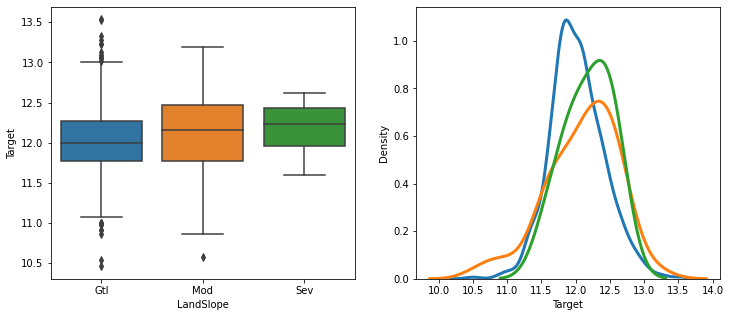

In [44]:
segm_target(train_set, cats.columns[9], 'Target')

,count,mean,max,min,median,std
BldgType,,,,,,
1Fam,973,12.051200,13.534474,10.460271,12.040614,0.409581
2fmCon,22,11.714521,12.341263,10.915107,11.725976,0.286507
Duplex,46,11.780603,12.237092,11.314487,11.822252,0.211888
Twnhs,37,11.795085,12.345839,11.302217,11.891369,0.295938
TwnhsE,88,12.051285,12.813921,11.289794,12.054238,0.330384


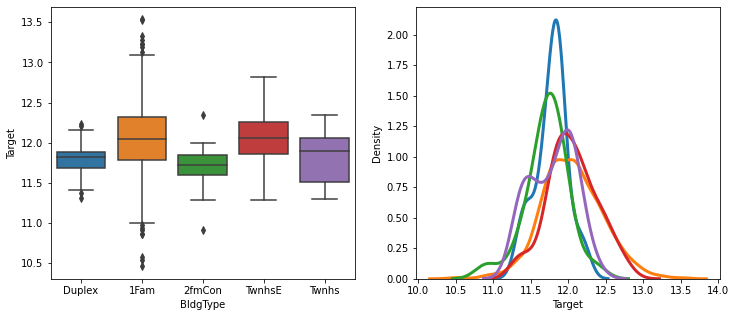

In [45]:
segm_target(train_set, cats.columns[13], 'Target')

,count,mean,max,min,median,std
HouseStyle,,,,,,
1.5Fin,123,11.814171,12.850557,10.542733,11.782960,0.340525
1.5Unf,10,11.583017,11.790565,11.373675,11.600814,0.141737
1Story,574,11.989624,13.323929,10.460271,11.944714,0.410104
2.5Fin,6,12.193101,13.071072,11.552156,12.128985,0.568091
2.5Unf,8,11.903425,12.691584,11.522886,11.788150,0.392750
2Story,364,12.188171,13.534474,10.915107,12.160385,0.369995
SFoyer,32,11.805952,12.237092,11.289794,11.823933,0.238560
SLvl,49,12.014051,12.751303,11.418626,12.028745,0.228101


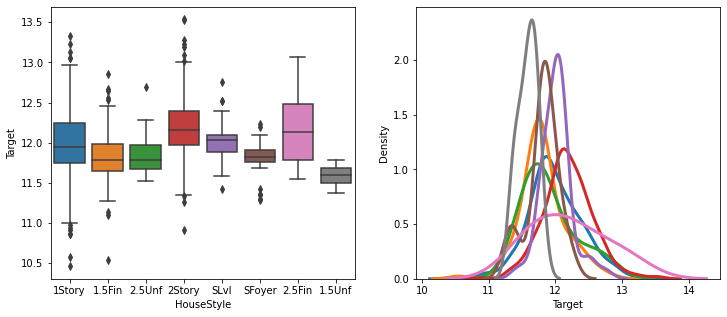

In [46]:
segm_target(train_set, cats.columns[14], 'Target')

,count,mean,max,min,median,std
MasVnrType,,,,,,
BrkCmn,11,11.885626,12.531776,11.607335,11.842236,0.263243
BrkFace,352,12.173350,13.534474,11.320566,12.125406,0.347471
None,697,11.893713,13.521141,10.460271,11.867104,0.364996
Stone,98,12.429558,13.323929,11.686887,12.425865,0.377575


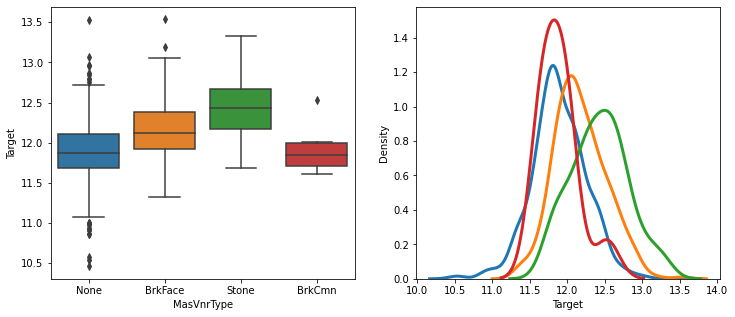

In [47]:
segm_target(train_set, cats.columns[19], 'Target')

,count,mean,max,min,median,std
ExterQual,,,,,,
Ex,41,12.804920,13.534474,12.081082,12.823631,0.319093
Fa,11,11.220981,11.711785,10.579005,11.314487,0.329191
Gd,391,12.310935,13.521141,10.859018,12.314932,0.288026
TA,723,11.840067,12.850557,10.460271,11.845110,0.290072


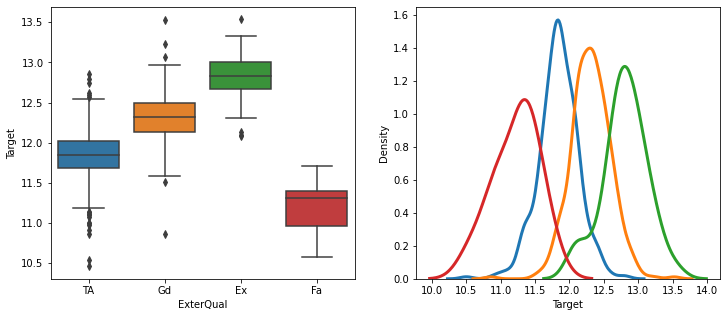

In [48]:
segm_target(train_set, cats.columns[20], 'Target')

/home/lucabasa/Git/kaggle_competitions/houseprice/hp/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


,count,mean,max,min,median,std
HeatingQC,,,,,,
Ex,594,12.209485,13.534474,11.104972,12.187149,0.370449
Fa,39,11.581969,12.345839,10.542733,11.703554,0.451899
Gd,191,11.921235,12.886644,10.859018,11.931642,0.318721
Po,1,11.373675,11.373675,11.373675,11.373675,NaN
TA,341,11.817935,12.791359,10.460271,11.813037,0.314329


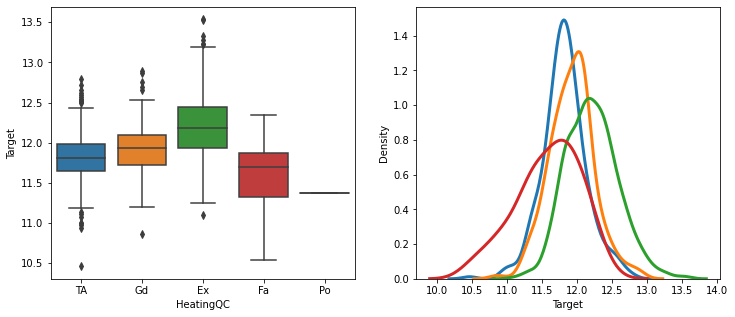

In [49]:
segm_target(train_set, cats.columns[29], 'Target')

,count,mean,max,min,median,std
CentralAir,,,,,,
N,80,11.506346,12.491176,10.460271,11.502834,0.381048
Y,1086,12.064336,13.534474,10.859018,12.043265,0.374701


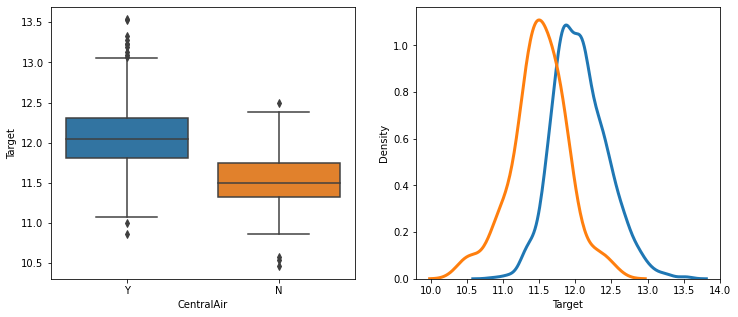

In [50]:
segm_target(train_set, cats.columns[30], 'Target')

,count,mean,max,min,median,std
GarageType,,,,,,
2Types,5,11.872651,12.137264,11.373675,11.918397,0.296850
Attchd,686,12.161124,13.534474,11.002117,12.128117,0.336671
Basment,14,11.927821,12.791359,10.933000,11.911348,0.439980
BuiltIn,76,12.381833,13.275829,11.418626,12.334850,0.393289
CarPort,6,11.603902,12.013101,11.314487,11.560335,0.253804
Detchd,314,11.775048,13.071072,10.976799,11.765634,0.272427
NoGrg,65,11.468998,12.208575,10.460271,11.492733,0.351975


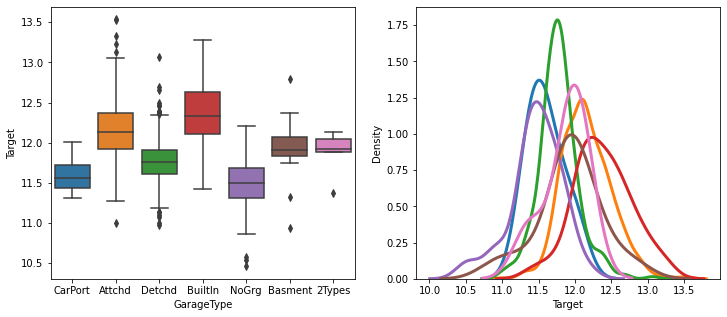

In [51]:
segm_target(train_set, cats.columns[35], 'Target')

,count,mean,max,min,median,std
GarageFinish,,,,,,
Fin,278,12.318569,13.534474,11.320566,12.286128,0.370954
NoGrg,65,11.468998,12.208575,10.460271,11.492733,0.351975
RFn,336,12.170259,13.275829,11.133143,12.154785,0.294461
Unf,487,11.833927,13.071072,10.933000,11.813037,0.297419


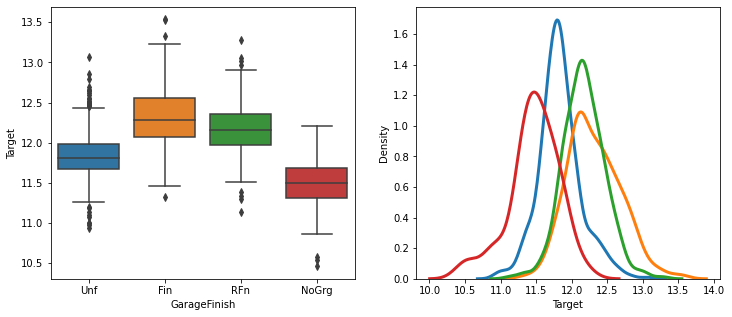

In [52]:
segm_target(train_set, cats.columns[36], 'Target')

,count,mean,max,min,median,std
SaleCondition,,,,,,
Abnorml,83,11.796229,13.521141,10.460271,11.775297,0.433543
AdjLand,4,11.529157,11.755879,11.302217,11.529266,0.255059
Alloca,10,11.997317,12.791359,10.933000,12.017773,0.512739
Family,16,11.868798,12.464587,11.320566,11.852457,0.330097
Normal,962,12.008337,13.534474,10.579005,11.990716,0.368281
Partial,91,12.475594,13.323929,11.635152,12.481566,0.373980


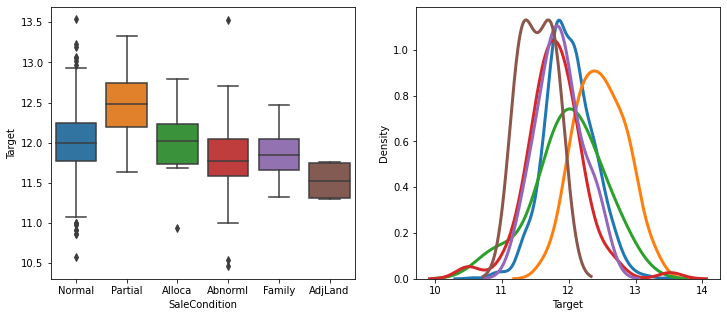

In [53]:
segm_target(train_set, cats.columns[44], 'Target')

All these plots are inviting us to recode these feature in order to have a more interpretable signal or simply less noise in the data.

## Numerical and categorical features

We mentioned before the expected correlation between garage cars and garage size, this is easily observable in the following plot.

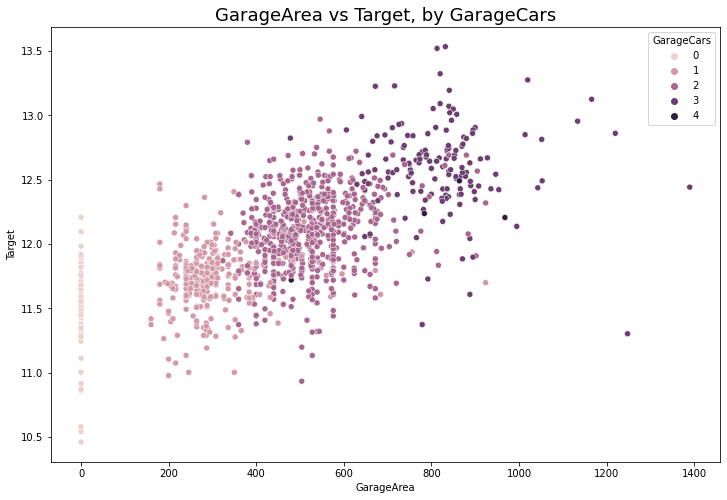

In [54]:
plot_bivariate(train_set, 'GarageArea', 'Target', hue='GarageCars')

Or how that the price exhibited some seasonality with the YearBuilt feature, probably related to the Neighborhood.

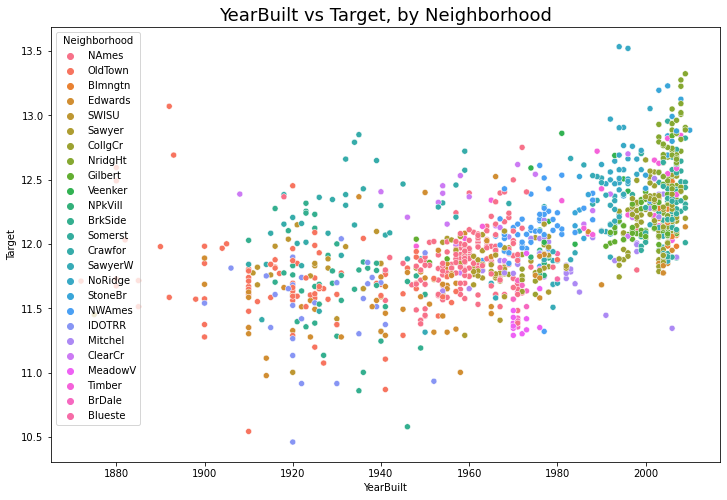

In [55]:
plot_bivariate(train_set, 'YearBuilt', 'Target', hue='Neighborhood')

Or we can see if the most important numerical features exhibit some pattern when segmented.

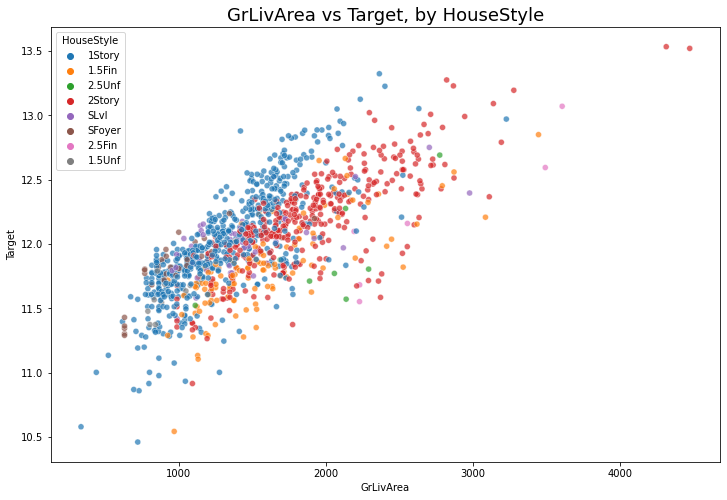

In [56]:
plot_bivariate(train_set, 'GrLivArea', 'Target', hue='HouseStyle', alpha=0.7)

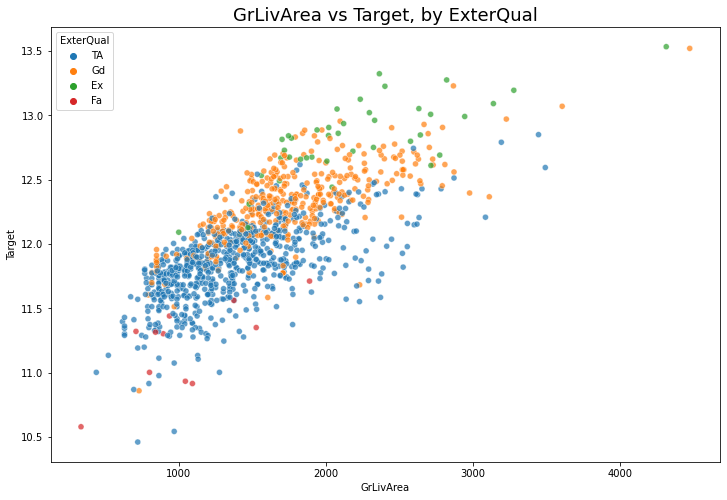

In [57]:
plot_bivariate(train_set, 'GrLivArea', 'Target', hue='ExterQual', alpha=0.7)

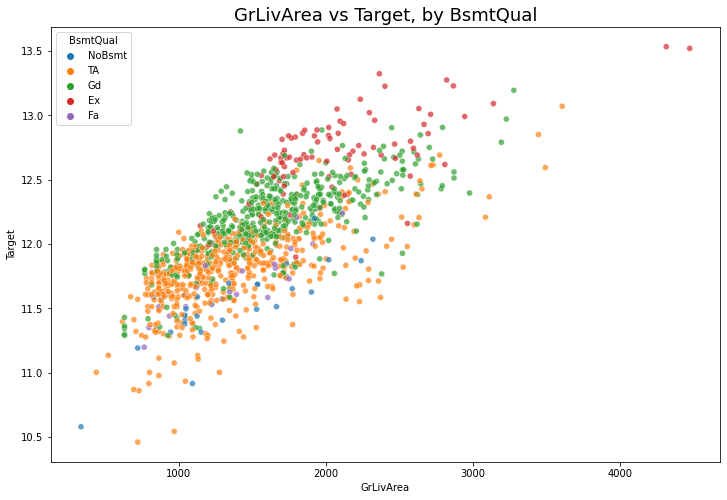

In [58]:
plot_bivariate(train_set, 'GrLivArea', 'Target', hue='BsmtQual', alpha=0.7)

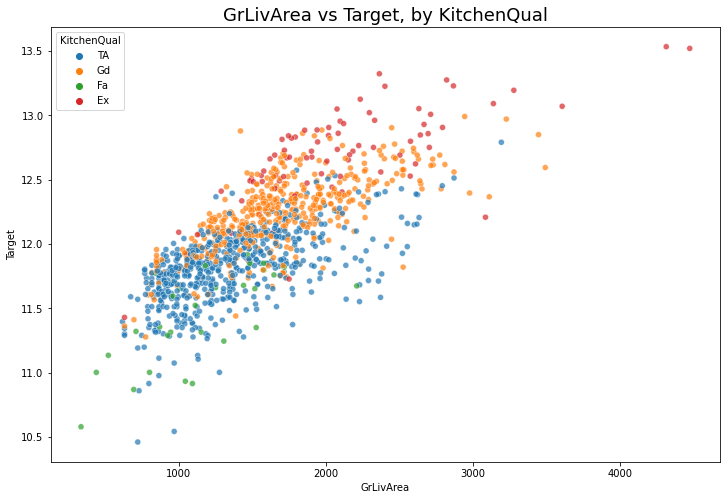

In [59]:
plot_bivariate(train_set, 'GrLivArea', 'Target', hue='KitchenQual', alpha=0.7)

These will be all features we want to include in our models.

## Missing values

After our general cleaning, we are left with some missing values. We can conclude this exploration by trying to spot patterns in how these missing values are presenting themselves.

In [60]:
list_missing(train_set)

Column MasVnrType: 0.69% missing
Column MasVnrArea: 0.69% missing
Column BsmtFinType2: 0.09% missing
Column Electrical: 0.09% missing
Column MiscFeature: 96.14% missing


['MasVnrType', 'MasVnrArea', 'BsmtFinType2', 'Electrical', 'MiscFeature']

MiscFeature is basically always missing, we won't use it anyway and we will not explore it. The others do not show any particular pattern and we will thus either drop them or impute with very simple methods.

In [61]:
train_set[train_set.BsmtFinType2.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MisBsm,MisGarage,Target
332,333,20,RL,85.0,10655,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NoPool,NoFence,NaN,0,10,2009,WD,Normal,0.0,0.0,12.556733
